<a href="https://colab.research.google.com/github/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Copy_of_6_pysal_weights_moran_lisa_CFediting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Working with Pysal on Weights, Moran and Lisa: Spatial Statistical Analysis**#

In this exercise we're going to get into some key spatial statistics. So far in this course we've mostly been visualising spatial distributions and patterns. Here we will run statistical tests to determine whether nor not a pattern or spatial structure exists, and to test what kind of pattern (dispersed vs. random vs. clustered) is present.

So we are doing more spatial analysis but this is design towards **spatial statistical analysis** and **not deterministic analysis** -which is for instance polygon overlay, intesection, detection, etc. We are talking about **probalistic analysis** and we are primarly interested in vector-based data (points, lines and polygons). BUT, don't disappointed or alarmed about your raster dataset as there is always a way! Yes, you will also learn in this practical lab how to test them too by converting them into in vector based datasets.




### Let's get started...####  
<font color='orangered'> ~ déjà vu ~</font> 
* Make your own copy of this notebook;
* Get your tools... you know install and import your libraries...
* Remember to hit play or type 'Ctrl'+'Enter' to run the code in any cell (grey shaded cells in the page) to make things happen!

Remember that broken thing two weeks ago? Yep, still broken... hence the long list of imported libraries.


In [3]:
##codecell_Spatial_Statistical_Analysis_ImportUrLibraries

# start by installing tools as usual
!pip install geopandas
!pip install descartes
!pip install mapclassify
!pip install pysal

#@title
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

     |████████████████████████████████| 921kB 5.0MB/s 
     |████████████████████████████████| 10.1MB 53.2MB/s 
     |████████████████████████████████| 11.8MB 202kB/s 
  Created wheel for mapclassify: filename=mapclassify-2.1.1-cp36-none-any.whl size=29001 sha256=6006176608f38f716ea56cde39a15c5cdc9dad6b5a7197563354a899517e99cb
  Stored in directory: /root/.cache/pip/wheels/fc/b8/58/56b650743289cbecb476ef1fc50ab0aeaa0b12e56ad912d624
Successfully built mapclassify
     |████████████████████████████████| 25.0MB 94kB/s 
  Created wheel for pysal: filename=pysal-2.1.0-py2.py3-none-any.whl size=25330028 sha256=761448f95803d21842b62f9befede768ff55297df28b913c5fd56ef5d20cf548
  Stored in directory: /root/.cache/pip/wheels/d3/83/3d/697615f4ce74486679f237d1d6a1cf70cd742fa6a34baba744
Successfully built pysal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  

In [4]:
##codecell_Spatial_Statistical_Analysis_ImportUrLibraries


#and importing tools...
import geopandas as gpd 
import requests 
import zipfile
import io
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import pandas as pd 
import pysal as ps
import numpy as np


/usr/local/lib/python3.6/dist-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


 **Learning a new language – decomposing the code** 
  <br>
  in ##codecell_Spatial_Statistical_Analysis_ImportUrLibraries. These are what we call **prerequisites**. You know by now that they are basic tools so you can get started.
* *Pandas* let you manipulate your data. <font color='orangered'> ~ déjà vu ~</font>
* *Geo-pandas* let you manipulate your geographic data. <font color='orangered'> ~ déjà vu ~</font>
* *requests* let you access easily Hypertext Transfer Protocol or [HTTP](https://www.w3schools.com/tags/ref_httpmethods.asp) library ([doc.](https://realpython.com/python-requests/)).
* *zipfile* let you reate, read, write, append, and list a ZIP file.<font color='orangered'> ~ déjà vu ~</font>
* *io* (input/open) let you to access files and streams (a stream is sequence of data elements made available over time - processed 1 at a time)<font color='orangered'> ~ déjà vu ~</font>
* *matplotlib* let you plot in 2D which extensive plotting library for quality publication & *matplotlib.pyplot* provides a MATLAB-like way of plotting <font color='orangered'> ~ déjà vu ~</font>
* *seaborn* let you do statitistical data visualisation.<font color='orangered'> ~ déjà vu ~</font>
* *numpy* let you do statistics especially statistics using numpy.<font color='orangered'> ~ déjà vu ~</font>
* *pysal* <font color='orangered'> ~ déjà vu ~</font> we have use it before in lab4_SpatialPatterns. This is the one I'd like you to spend a bit more time with...Why? because this library is used to conduct exploratory spatial data analysis. You can have a look at its [documentation](https://pysal.readthedocs.io/en/v1.11.0/users/introduction.html), a [video]((https://www.youtube.com/watch?v=FN1nH4Fkd_Y)) of one of its creator  and high level applications for spatial analysis (see image below).
<div>
<img src="https://sergerey.org/images/pysal.png" width="500"/>
</div>


##**Preparing your Data**##

You must have realised by now that the most time consuming part of your work is to prepare your data ... This is important because the way you will use or re-use a dataset has to be organised around your research aims, the questions you are trying to answer.

The following scripts are very much what you have done in previous practicals, in particular Lab4_spatial_patterns_in_excavation  where we will:
* import
* read
* select/extract
* merge 

In [5]:
##codecell_Spatial_Statistical_Analysis_ImportOurData

# And now, as usual, get the data
url = 'https://github.com/ropitz/spatialarchaeology/blob/master/gabii_spatial.zip?raw=true'
local_path = 'temp/'

print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")

#here this is very much like what we are doing on your PC file system
z.extractall(path=local_path) # extract to folder

#here we want to download the shapefiles
# so we sort them using sorted()
#so we have a comprehensive list of all variables available in our dataset
# print them
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

#here you know it ...
#we use function read() to access the data from this notebook and work with it
dbf, shp, shx = [filename for filename in filenames]
gabii = gpd.read_file(local_path + 'gabii_SU_poly.shp')

Done
['gabii_SU_poly.dbf', 'gabii_SU_poly.shp', 'gabii_SU_poly.shx']


In [6]:
##codecell_Spatial_Statistical_Analysis_Peek@OurData

# As you've done before, print out some information on the data 
# To check the number of records in the file, so it has loaded in ok
# And preview the data 
print("Shape of the dataframe: {}".format(gabii.shape))
print("Projection of dataframe: {}".format(gabii.crs))
gabii.tail() #last 5 records in dataframe

Shape of the dataframe: (6774, 11)
Projection of dataframe: {}


,DESCRIPTIO,GlobalID,tomb_ID,notes,Room_ID,SU,Excavated,Top_of_Wal,SHAPE_Leng,SHAPE_Area,geometry
6769,BOT,{71AF9B12-2F06-495C-83E5-0FAA360F8F4A},0.0,None,None,7258,0,0,2.678564,0.499149,"POLYGON Z ((2330859.598 4639809.998 58.475, 23..."
6770,PV,{0ACC8266-B607-4C90-80BC-CAA66B641158},0.0,basalt pavement,None,7259,0,0,1.884223,-0.011060,"POLYGON Z ((2330859.928 4639810.684 59.054, 23..."
6771,PV,{04AAFA17-1C2C-48DC-8D98-3F159C9594ED},0.0,road preparation,None,7260,0,0,4.340378,-0.315862,"POLYGON Z ((2330859.690 4639810.676 59.299, 23..."
6772,DEP,{29409DA1-5E72-4C40-B9EB-DF30BDA4AB99},0.0,surface,None,7244,0,0,3.931959,0.684395,"POLYGON Z ((2330858.600 4639808.870 59.492, 23..."
6773,FEAT,{800479EB-554B-4180-85C5-91DA0FE8C762},0.0,bedrock,None,7255,0,0,3.960617,-0.958252,"POLYGON Z ((2330859.137 4639808.867 58.846, 23..."


In [7]:
##codecell_Spatial_Statistical_Analysis_ObjectType&SU

# As we've done before (returning to the Gabii finds data - see ###codecell_SpatialPatterns_WhichTypeOfSpecialFinds&fromWhere?) 
# Get the non-spatial special finds data
# And they are archived per SU /Stratigraphical Unit
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su.head()

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN


In [8]:
##codecell_Spatial_Statistical_Analysis_FindsBecomesSpatial

#Then let's combine our polygons representing context shape and location
# with the special finds data
# We can use known command  'merge()' for this (see especially explanation for this in #codecell_Webmaps&Distributions_MergingZeData and also ###codecell_SpatialPatterns_TextileToolsBecomesSpatial)

gabii_textools = gabii.merge(sf_su, on='SU')
gabii_textools.head()

,DESCRIPTIO,GlobalID,tomb_ID,notes,Room_ID,SU,Excavated,Top_of_Wal,SHAPE_Leng,SHAPE_Area,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,DEP,{7547F186-D2C4-421D-A91C-330DE54C991A},0.0,None,None,1376,0,0,4.234191,0.867656,"POLYGON Z ((2330811.445 4639824.504 62.386, 23...",297,ring,Ring
1,DEP,{7547F186-D2C4-421D-A91C-330DE54C991A},0.0,None,None,1376,0,0,4.234191,0.867656,"POLYGON Z ((2330811.445 4639824.504 62.386, 23...",305,nail,NaN
2,DEP,{9749D670-DB74-425F-A059-9AA7C4DDB408},0.0,None,None,1375,0,0,4.282142,0.886152,"POLYGON Z ((2330811.441 4639824.495 62.385, 23...",300,stamp,NaN
3,DEP,{9749D670-DB74-425F-A059-9AA7C4DDB408},0.0,None,None,1375,0,0,4.282142,0.886152,"POLYGON Z ((2330811.441 4639824.495 62.385, 23...",398,stamp,NaN
4,DEP,{33BC7316-B87A-4FAD-B117-043B1B72927E},0.0,None,None,2258,0,0,33.824963,42.657425,"POLYGON Z ((2330865.519 4639860.941 61.348, 23...",320,Bone knob head hairpin,Pin


In [9]:
##codecell_WorkingWithPysal_DataPreparation

#Let's pull all those find types out of the big list. 
#These commands should look familiar because you've done them before (###codecell_SpatialPatterns_SpecialFindsSelection)
types = ['Loom Weight','Spool','Spindle Whorl']
textile_tools = gabii_textools.loc[gabii_textools['SF_OBJECT_TYPE'].isin(types)]

# Now let's count up how many of these tools appear in each context (SU).
# This command will print out a list of the number of textile tools in each SU next to that SU number.
textile_tool_counts = textile_tools.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)


gts = gabii_textools.merge(textile_tool_counts, on='SU')
gts_new = gts.drop_duplicates(subset="SU")
gts_new.head()

,DESCRIPTIO,GlobalID,tomb_ID,notes,Room_ID,SU,Excavated,Top_of_Wal,SHAPE_Leng,SHAPE_Area,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE,Loom Weight,Spindle Whorl,Spool
0,DEP,{33BC7316-B87A-4FAD-B117-043B1B72927E},0.0,None,None,2258,0,0,33.824963,42.657425,"POLYGON Z ((2330865.519 4639860.941 61.348, 23...",320,Bone knob head hairpin,Pin,0.0,0.0,1.0
4,DEP,{9322E5A4-3B71-4E18-A8D3-61067000D37A},0.0,survey innacuracy circa 4cm,None,516,0,0,29.108417,24.196861,"POLYGON Z ((2330791.518 4639855.147 64.693, 23...",261,spool,Spool,1.0,0.0,1.0
6,DEP,{14B94C91-950D-4F3F-8CB0-A3D3CF196FCE},0.0,None,None,587,0,0,31.845889,35.011648,"POLYGON Z ((2330786.540 4639851.471 64.633, 23...",262,loom weight,Loom Weight,1.0,0.0,0.0
8,DEP,{34DFB891-ECF7-477A-939D-87491FA05165},0.0,None,None,1306,0,0,26.189290,11.969015,"POLYGON Z ((2330807.058 4639840.405 63.413, 23...",281,complete vessel,Votive,0.0,0.0,1.0
11,DEP,{9CBC09F7-DBBF-4F8E-A6F9-278240E34672},0.0,None,None,1327,0,0,39.322690,67.846039,"POLYGON Z ((2330807.254 4639825.210 63.122, 23...",287,gaming piece - die,Game Piece,1.0,0.0,0.0


##**Visualising your Data**##
Now plot your data to visualise it with a focus on the Spool Distribution of Gabii excavations. 

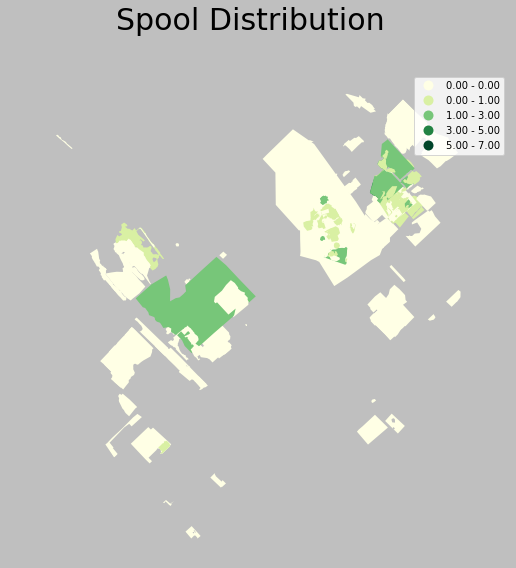

In [10]:
##codecell_Spatial_Statistical_Analysis_PlotZeData

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot SUs
#gabii.plot(ax=ax, facecolor='0.85', linewidth=0)

# Quantile choropleth of deaths at the street level
gts_new.plot(column='Spool', scheme='fisher_jenks', ax=ax, \
        cmap='YlGn', legend=True, linewidth=3)
# Plot pumps
#xys = np.array([(pt.x, pt.y) for pt in pumps.geometry])
#ax.scatter(xys[:, 0], xys[:, 1], marker='^', color='k', s=50)
# Remove axis frame, also called graticule
ax.set_axis_off()
# Change background color of the figure
f.set_facecolor('0.75')
# Keep axes (your x and y) proportionate
plt.axis('equal')
# Title 
# f.suptitle()command allows you to add a centered title to the figure
f.suptitle('Spool Distribution', size=30)
# Draw
plt.show()

---------------------
####**Visualisation**####

They are different ways to visualise your variables... and this depends on the nature of your data, or the level of measurements:

> data type | | | | |
> ---|---|---|---|---
> | Nominal|Qualitative ||
> | Ordinal| Ranked |
> |Numerical| Quantitative||

>>>> <img src="http://article.sapub.org/image/10.5923.j.ajgis.20170601.02_002.gif" width="300"/> </div> 

To represent:

* **qualitative data** :*Change of form, of pattern, of texture, of orientation, of hue*
* **rank or ordering data** : *Variation in dimension, in colour or pattern strength lightness*
* **quantitative data** :*Change in dimension, in lightness*




<img src="http://article.sapub.org/image/10.5923.j.ajgis.20170601.02_003.gif" width="500"/>
</div>



---------------------



##**Spatial Statistical Analysis**##

So far, you've (rapidly) repeated the steps you've done in a previous exercise to visualise a spatial pattern - this time of the spools discovered while excavating at Gabii. 

Now how do you statistically test if there is a pattern? Because it's not so obvious from just looking at the distribution. We can start with some of the more basic tests: **Moran's** and **local Moran's**, which are tests for spatial autocorrelation. Moran's I statistic (1948, 1950) is one of the classic (as well as one of the most common) ways of measuring the degree of spatial autocorrelation in areal data. 

>**But how does this work? what does this means?** You have seen that objects in space are rarely randomly distributed. In fact, they usually have some degree of patchiness (i.e., they are spatially clustered) which can produce a variety of distinct spatial patterns characteristic of their size and/or shape.<br> As spatial structures have their own intensity (magnitude) and size (extent) that make them distinct.  <br> These patterns can be quantified according to the degree of similarity between the objects in their attributes or quantitative values. <br> So, the first step is to determine whether the actual locations (coordinates) of observational data matter in explaining the spatial arrangement. Meaning you need first to  to  test  if  nearby  objects  tend  to  have  similar  attributes  or  to  be  more  clustered  (Figure  below(a))  than expected from randomness alone (Figure 6.1(b)). 

><div> <img src="https://raw.githubusercontent.com/Francoz-Charlotte/Spatial_teaching_CFediting/master/Untitled.png" width="500"/> </div>


>The presence of spatial structures means that  similarity  varies  with  distance  between  the  locations  and  how  this  variation  is  affected  by  distance is known as the structure of the variable's spatial autocorrelation. 

> Spatial  statistics  assume  that,  within the  study  area,  the  parameters  of  the  function  defining  the  underlying  process,  such  as  the  mean  and  the variance, are constant regardless of the distance and direction between the sampling locations. This property of the random function is known as *spatial stationarity*. 

> Then the goal of spatial statistics is **to test the null hypothesis of absence of ‘spatial pattern’**. For each spatial statistic ‘spatial pattern’ is either spatial aggregation or segregation (Ripley's K;join count statistics) or spatial autocorrelation (Moran's Iand Geary's  c).  The  null  hypothesis  implies  that  nearby  locations  (or  attributes,  measures) do  not  affect  one another  such  that  there  is  independence  and  spatial randomness.  **The  alternatives**  are  that there is clustering and thus positive spatial autocorrelation or repulsion and negative spatial auotocorrelation.

>(*Fortin, M. & Dale, M. (2009). Spatial autocorrelation. In Fotheringham, A. S., & Rogerson, P. A. The SAGE handbook of spatial analysis (pp. 89-103). London: SAGE Publications,*). 

There is a **must-do** for all statistical tests, and **one assumption** of regression analysis as applied to spatial data is that the **residuals are not spatially autocorrelated**. You know the residuals, is what's left-over after an analysis, the part which has not been explained by the statistics. So, no spatial pattern should be found to the errors. Residuals that are not independent can affect estimates of the variances of the coefficients and hence make it difficult to judge their significance. When the analysis violate this assumption, the results of the analysis can be misleading or completely erroneous. (*Spatial patterns. (2001). In Rogerson, P. A. Statistical methods for geography (pp. 154-178). London: SAGE Publications*) 


###**Moran's I test**###

In a nutshell, the Moran’s I statistic provides a correlation coefficient for the relationship between a variable and its surrounding values. It differs from correlation test (<font color='orangered'> ~ déjà vu in Lab4-spatial-patterns Data interpretation: using association and relationships~</font>) because the emphasis is placed on the role of the weights. 

So, which kind of statitics it is? It is an inferential statistic...what? basically you need to know the statistical significance before your interpret the results (very much like hypothese testing, z-score testing). So, I know I repeat a bit but so you understand how the test works:
* null hypothesis = the data is randomly disbursed.
* alternative hypothesis = the data is more spatially clustered than you would expect by chance alone. 
* Two possible scenarios are:
        A positive z-value: data is spatially clustered in some way, but, not with  very high cluster or with very low cluster values (either or combination).
        A negative z-value: data is clustered in a competitive way. For example, high values may be repelling high values or negative values may be repelling negative values.=> suggests presence of spatial outliers and spatial heterogeneity (like image -c- above or a chest board game).

We could do a join count to statistically evaluate the presence or absence of spatial autocorrelation, however this test can only use the signs (+ or -) of the residuals (you know what's left after the test is run & the most important part of any regressio analysis) but not their magnitude. Moran's I is an alternative test of spatial autocorrelation.

You can read about [Moran's](https://mgimond.github.io/Spatial/spatial-autocorrelation.html). If you prefer a video, this one  [this](https://www.youtube.com/watch?v=_J_bmWmOF3I) one is very clear on how to interpret the resulst of a Moran's test.



####**To start your Moran's I test**###

As you may have suspected, we need to do something first before running the Moran's I. And, as said above, the emphasis of the Moran's I spatial analysis is on the role of the weights. So, one of the vital steps of spatial autocorrelation modelling is to construct a square spatial weights matrix. The spatial weights can be based on:
* Contiguity [Pysal-notes](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#contiguity-based-weights)
* Distance [Pysal-notes](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#distance-based-weights)
* Distance band [Pysal-notes](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#distance-band-weights)
* Kernel [Pysal-notes](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#kernel-weights)
* K-nearest neighbours [Pysal-notes](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#k-nearest-neighbor-weights)
which can be illustrated as such:

<div><img src="https://cdn-images-1.medium.com/max/800/0*QmLAPLYUDcpJYwvo.png" width="400"/></div> *where 0= no weights and 1


**How to select weight function objectively** is still a pending question remaining to be resolved. If we fail to choose a proper weight function, the result and effect of spatial analysis will not be satisfying and convincing, or even the calculation will be distorted. 




#####**Let's define the weights**#####
What we mean by that is that we need to define how strongly or not strongly objects influence each other... Let's run the exercise to understand with a real dataset that you know: Gabii excavations.

In [11]:
##codecell_Spatial_Statistical_Analysis_MoranStatistics_defineweights

# To start your Moran's statistical test, you need to create weights that define how strongly you think things near to one another influence one another.
# see the types of weights available to you by looking in pysals help file
help(ps.lib.weights)

Help on package pysal.lib.weights in pysal.lib:

NAME
    pysal.lib.weights

PACKAGE CONTENTS
    _contW_lists
    adjtools
    contiguity
    distance
    set_operations
    spatial_lag
    spintW
    tests (package)
    user
    util
    weights

FILE
    /usr/local/lib/python3.6/dist-packages/pysal/lib/weights/__init__.py




In [16]:
##codecell_Spatial_Statistical_Analysis_MoranStatistics_KNN_weights

#create some weights. I've gone with KNN weights. 
#we want to see what is happening with the Spools 

#let's first subselect them and create a gts_spool
gts_spool = gts_new[['SU','Spool']]

#let's have the nearest neighbours weights 
#we choose a k-distance of 5
gts_spool_weights = ps.lib.weights.KNN(gts_spool,5)
#here we Ignore the warnings because
#we know that not all the SU areas connect up physically

/usr/local/lib/python3.6/dist-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 9 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


#####**Let's add the k-weights as an attribute to your data**#####

the new weights are not necessarily in the same order than your original dataframe... let's fix this so we can use the weight as an attribute, i.e. a new variable of the dataset.

Here we create a matrix,(you know it, a matrix is build like this: <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Matrix.svg/1200px-Matrix.svg.png" width="100"/>) which contains the spatial weights <img src="https://petewarden.files.wordpress.com/2015/04/fcgemm_corrected.png?w=768&h=253" width="220"/>.


**Why a matrix?** because this is the way geographical space is formally encoded into a numerical form so it is easy for a computer (or a statistical method) to understand.



In [0]:
##codecell_Spatial_Statistical_Analysis_MoranStatistics_DefineMatrix

# Rename IDs to match those in the `segIdStr` column
gts_spool_weights.remap_ids(gts_spool.index)

# Row standardise the matrix
gts_spool_weights.transform = 'R'

 **Learning a new language – decomposing the code** 
  <br>
  in ##codecell_Spatial_Statistical_Analysis_MoranStatistics_DefineMatrix, to keep things aligned, you have <font color='magenta'> .remap_ids() </font> which is to rename the IDs of the matrix to match those in the table.

Often there is a need to apply a transformation <font color='magenta'> .transform = 'R' </font> to the spatial weights, such as in the case of row standardisation. You can use .transform = 'b' for binary and 
.transform = 'v' for variance stabilising [doc](https://pysal.readthedocs.io/en/v1.11.0/users/tutorials/weights.html#weight-transformations). 

**~ Behind the scenes ~** the transform property is updating all other characteristics of the spatial weights that are a function of the values and these standardisation operations, freeing the user from having to keep these other attributes updated. 

#####**Let's add Spatial lag**#####
Now you have the data and the spatial weights matrix ready.

Let's start by computing the spatial lag of the spool distribution. The spatial lag is the product of the spatial weights matrix and a given variable and that, if  gts_spool_weight  is row-standardised, the result amounts to the average value of the variable in the neighborhood of each observation.

The product means multiply matrices nad it would look something like this: <div><img src="https://hadrienj.github.io/assets/images/2.2/dot-product.png" width="200"/></div>


We can calculate the spatial lag for the variable 'Spool' and store it directly in the main table with <font color='magenta'> .lag_spatial() </font>:

In [15]:
##codecell_Spatial_Statistical_Analysis_MoranStatistics_SpatialLag

#add the weights you've created to the attribute table
gts_spool['gts_spool_weights'] = ps.lib.weights.lag_spatial(gts_spool_weights, gts_spool['Spool'])
gts_spool.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SU,Spool,gts_spool_weights
0,2258,1.0,0.8
4,516,1.0,0.2
6,587,0.0,0.2
8,1306,1.0,0.2
11,1327,0.0,0.4


#####**Standardisation against biaised dataset**#####

Whenever there is a risk that the distribution of your features (see decomposing the code of *#codecell_RasterLandscape_BandsDataType* as a reminder) is potentially biased due to sampling design or an imposed aggregation scheme. Read about [standardisation](http://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-statistics-toolbox/modeling-spatial-relationships.htm#GUID-DB9C20A7-51DB-4704-A0D7-1D4EA22C23A7) in spatial modelling.


So now we need to remove potentially biased distribution in our dataset by standardising our counts and standardising means to substract the average value and divide by the standard deviation each observation of the column.

In [26]:
##codecell_Spatial_Statistical_Analysis_MoranStatistics_Standardisation&SpatialLag

# standardise the counts of the number of spools in each context and the weights
#we are simply applying some math here
gts_spool['spool_std'] = (gts_spool['Spool'] - gts_spool['Spool'].mean()) / gts_spool['Spool'].std()
gts_spool['w_spool_std'] = ps.lib.weights.lag_spatial(gts_spool_weights, gts_spool['spool_std'])
gts_spool.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SU,Spool,spool_std,w_spool_std
0,2258,1.0,0.277424,0.101860
4,516,1.0,0.277424,-0.424831
6,587,0.0,-0.600394,-0.424831
8,1306,1.0,0.277424,-0.424831
11,1327,0.0,-0.600394,-0.249267


**Learning a new language – decomposing the code** 
  <br>
  in ##codecell_Spatial_Statistical_Analysis_MoranStatisticstandardisation&SpatialLag, to make sure our varaibles distribution is not biaised, we apply some basic algebra:

<div><img src="https://raw.githubusercontent.com/Francoz-Charlotte/Spatial_teaching_CFediting/master/Lab6_MoransI_stand%26SpatialLag_.png" width="1200"/></div>

In [0]:
#get some more tools for the Moran test
from pysal.explore.esda.moran import Moran

In [28]:
# Run the Moran test
mi = Moran(gts_spool['Spool'], gts_spool_weights)
mi.I


0.14024220082341388

What does the value above mean?
Read how to [interpret the results](https://www.statisticshowto.datasciencecentral.com/morans-i/).

Are your spools actually clustered?

Now plot the results.

The cluster/outlier type (COType) field distinguishes between a statistically significant cluster of high values (HH), cluster of low values (LL), outlier in which a high value is surrounded primarily by low values (HL), and outlier in which a low value is surrounded primarily by high values (LH). Statistical significance is set at the 95 percent confidence level. 

In [0]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='spool_std', y='w_spool_std', data=gts_spool)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
ax.set_xlim(-2, 7)
ax.set_ylim(-2.5, 2.5)
plt.text(3, 1.5, "HH", fontsize=25)
plt.text(3, -1.5, "HL", fontsize=25)
plt.text(-1, 1.5, "LH", fontsize=25)
plt.text(-1, -1.5, "LL", fontsize=25)
# Display
plt.show()

##**Moran's I to Moran's local**##

Actually, as you may have realised, Moran's I can tell you about the complete spatial pattern so it tells you about the clustering BUT it tells us nothing about where the clusters might be !  It only tells you that the pattern is more clustered than it would be if it would be under spatial randomness. 

So why do we need Moran's I then? weel you need to test the significance of your spatial analysis, i.e. that your regression is not violating your assumptions... so Moran's is a globalistic testing your statistic  specifications.

and, now, what do we do to get test the location of spatial clusters? we need a local statistic...To test this, we use the local variant of the Moran's test.

####**But might there be local patterns inside the global one?**####

In [0]:
# get the tools for the local test
from pysal.explore.esda.moran import Moran_Local

In [0]:
# run the local test
lisa = Moran_Local(gts_spool['Spool'].values, gts_spool_weights)

The local test breaks the global pattern down to test for the presence of local clusters. You can check at each SU whether or not it is likely (in a statistical significance sense) for it to participate in a local cluster.

A positive value for I indicates that a feature has neighboring features with similarly high or low attribute values; this feature is part of a cluster. A negative value for I indicates that a feature has neighboring features with dissimilar values; this feature is an outlier. In either instance, the p-value for the feature must be small enough for the cluster or outlier to be considered statistically significant. Note that the local Moran's I index (I) is a relative measure and can only be interpreted within the context of its computed z-score or p-value.

In [0]:
# Break observations into significant or not
gts_spool['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to - the high-high, high-low, low-high, low-low from before are quads 1-4
gts_spool['quadrant'] = lisa.q
gts_spool['significant'][:20]
# true means it is in a cluster, false means it is not

In [0]:
# You can read out the calculated p values for each 
lisa.p_sim[:20]

In [0]:
#add this info back onto the spatial data
gabii_spool_lisa = gabii.merge(gts_spool, on='SU')
gabii_spool_lisa.head()

Now we can make a map showing which quadrant each SU belongs to, essentially a display of where the local clusters are located.

High-high = 4
Low-low = 2

In [0]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot baseline su poly
gabii_spool_lisa.plot(column='quadrant',  ax=ax, \
        cmap='Blues', legend=True, linewidth=3)

ax.set_axis_off()
plt.axis('equal')
plt.show()

How would you interpret the results of this analysis?

## From Vector to Raster

You can run similar spatial statistics on raster data to understand trends and distributions of data. It is possible to convert from point vector data to raster data via the process of [interpolation](https://www.neonscience.org/spatial-interpolation-basics). There are many ways to interpolate data, which you can read about on the linked site.

##Whitebox is an open source GIS. 
It's full of hundreds of useful spatial tools. You can download it and run it standalone (without installing!) or you can call its functions from the jupyter notebook. It will be well worth checking out for your own independent projects.

Read about [Whitebox Tools](https://github.com/jblindsay/whitebox-tools)

In [0]:
# we're going to use the whitebox tools to interpolate our data and imageio to view it
!pip install whitebox
!pip install imageio
!pip install imageio tifffile

In [0]:
# import your tools and print the version to check it worked

import pkg_resources # provides runtime facilities for finding, introspecting, activating and using installed Python distributions
import whitebox #advanced geospatial data analysis platform. Well you need its toolbox for that (see 3 codeline down)!
import imageio # provides an easy interface to read and write a wide range of image data, including animated images, volumetric data, and scientific formats
import IPython # for displaying html outputs

wbt = whitebox.WhiteboxTools()
print(wbt.version())
print(wbt.help())

In [0]:
# when there are lots of tools, it's useful to call their help info to find out what the parameters are
print(wbt.tool_help("IdwInterpolation"))

In [0]:
# To interpolate, as you may have noticed in your reading, we need points rather than polygons. To have points we get the center of each polygon. 
# In these lines we essentially strip out the geometry information when we get the center of each polygon. Then we 'merge' to glue the attribute we are interested in interpolating back on to our data.

spool_centroids = gabii_spool_lisa.geometry.centroid
spoolgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(spool_centroids))
spool_centroids_attr = spoolgdf.merge(gabii_spool_lisa.spool_std,right_index=True,left_index=True)

In [0]:
# to work in whitebox effectively, we put this data out to a temporary shapefile
# we also set a data directory where we can put this file
wbt.set_working_dir(data_dir)
print(data_dir)
wbt.verbose = True
gabii_spool_shapes = spool_centroids_attr.to_file("/usr/local/lib/python3.6/dist-packages/whitebox/testdata/gabii_spool.shp")

In [0]:
# now we interpolate our centriods using the standardized spool weights and show the result
# note you can play around with the interpolation parameters to have different kernal sizes and cell sizes...
wbt.idw_interpolation(
    i="gabii_spool.shp", 
    field="spool_std",
    output="gabii_spool.tif", 
    use_z=False, 
    weight=2.0, 
    radius=5, 
    min_points=3, 
    cell_size=1, 
    base=None
)
raster = imageio.imread(os.path.join(data_dir, 'gabii_spool.tif'))
plt.imshow(raster)
plt.show()

Now you can calculate statistics on this dataset, for example using rasterio like we did last week, or using whitebox's tools.

For example, you can check to see if the data forms a normal distribution. 
This lets you know what kinds of statistical tests will be valid. As we discussed last week, often archaeological distributions are not normal.


In [0]:
wbt.ks_test_for_normality(
    "/usr/local/lib/python3.6/dist-packages/whitebox/testdata/gabii_spool.tif", 
    "normal", 
    num_samples=None
)

In [0]:
# view your results
IPython.display.HTML(filename='/normal.html')

You can also run a similar autocorrelation test to the LISA one we ran above with the vector data.

In [0]:
wbt.image_autocorrelation(
    " /usr/local/lib/python3.6/dist-packages/whitebox/testdata/gabii_spool.tif", 
    "gabii_autocorr.html", 
    contiguity="Rook"
)

In [0]:
# view your results
IPython.display.HTML(filename='/gabii_autocorr.html')

This exercise ends here. Hopefully you've learned that there are statistical tests for spatial patterns and that these let us go beyond 'just visualizing' to look for patterns. These tests can be run on either vector or raster data.

Clearly there's a lot to learn and explore in the world of spatial stats...

#**LexiCode**#
To re-use the codes - you will need to first load their respective libraries.  So far, you have used ...:

<br>

> libraries | | | |
>--- |--- | --- | --- |
>[folium](https://python-visualization.github.io/folium/) | [numpy](https://numpy.org/)  | [rasterio](https://rasterio.readthedocs.io/en/stable/quickstart.html)|
>[branca](https://pypi.org/project/branca/)| [rtree](https://pypi.org/project/Rtree/) | [richdem](https://richdem.readthedocs.io/en/latest/)|
>[pandas](https://pandas.pydata.org/)| [osmnx](https://osmnx.readthedocs.io/en/stable/)| [elevation](https://pypi.org/project/elevation/)|
>[geopandas](http://geopandas.org/)| [requests](https://realpython.com/python-requests/) | [zipfile](https://docs.python.org/3/library/zipfile.html) |
>[seaborn](https://seaborn.pydata.org/index.html) | [fiona](https://pypi.org/project/Fiona/)| [io](https://docs.python.org/3/library/io.html#overview) |
>[matplotlib.pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) | [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)|[seaborn](https://seaborn.pydata.org/) |
> [pysal](https://pysal.readthedocs.io/en/v1.11.0/users/introduction.html) | [os](https://docs.python.org/3/library/os.html)|[gdal](https://gdal.org/)|
>  [pkg_resources](https://setuptools.readthedocs.io/en/latest/pkg_resources.html#overview)|[whitebox](https://jblindsay.github.io/wbt_book/intro.html) |[imageio](https://pypi.org/project/imageio/) |
> [IPython](https://ipython.org/)

<br>


 plugins| |
--- |--- |
HeatMapWithTime 
HeatMap
MeasureControl
PrepareUrBasemaps_CreateLayers from [folium.plugins]
cluster (from sklearn)
rasterio.plot
mapping (from shapely.geometry)
Point(from shapely.geometry)  
mask (from rasterio.mask) 

<br>

your lexicode is non-exhaustive, keep expanding, find your own 'best way' to reuse these code/scripts...

<br>

>Lexicode_MakingaBasicMap | Lexicode_Webmaps&Distributions |Lexicode_StreetGridOrientations | Lexicode_SpatialPatterns | Lexicode_RasterLandscape | Lexicode_Pysal_weights_Moran_Lisa
>--- | --- | ---|---|----|---|
> ==   () [] | pd.concat() | { } *subselection from list*|%matplotlib inline  | .open()|.tail()
>.head_csv() | .dtype() | ox.gdf_from_places()|requests.get()|.print()
>.read_csv() | astype() | ox.plot_shape()|request.content()|dataset.name|
>mean()  | fillna()|network_type= ''|.bytes()|dataset.count|
>folium.Map | def return |ox.add_edge_bearings(ox.get_undirected())|gpd.GeoDataFrame.from_features()|dataset.shape|
>range() | .apply(lambda x:*function*,axis=) |count_and_merge()|Set()|dataset.descriptions|
>len() | pd.merge() |np.arrange()|pd.value_counts() |dataset.meta|
>iloc[]| how= , left_index= ,left_index= |np.histogram()|.merge()|dataset.driver|
>.value_counts()| gpd.GeoDataFrame()| ax.set_theta_location()|.sort_values|dataset.read
>if =:| geometry=gpd.points_from_xy |ax.set_ylim()|cluster.KMeans()|.shape
>elif =: |print() |ax.set_title()|.fit()|np.amean()
>else =:| .isin()|ax.set_yticks()|.drop() |np.amin ()
>folium.Marker()| classic.plot()|ax.set_xlabels() & ax.set_yticklabels|.assign()|np.amax()
>folium.Icon()| generateBaseMap()|plt.subplots()|plt.show()|np.std()
>folium.Circle| .groupby(['', ''])|.dropna()|.set_title|show()
>popup= | .reset_index() |polar_plot()|sns.pairplot()|cmap=
>radius= |  max_zoom= |pd.Series()|arrs.append()|np.seterr()
>.values.tolist() |folium.TileLayer()|np.pi|.show_hist()|[plt.imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)
>.add_to()| plugins.DualMap(location= , tiles= , zoom_start= )| | |clipped_img| 
> | | | |rd.TerrainAttribute()
>  | | | |rdShow() 
>  | | | |gdal_data.GetRasterBand()
>  | | | |gdal_band.GetNoDataValue()
>  | | | |gdal_data.ReadAsArray
>  | | | |gdal_data.ReadAsArray().astype(np.float)
>  | | | |plt.contour()
>  | | | |plt.contourf()

